In [97]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [98]:
# read data



def read_data_set(set_path,set_name):
    file_path = os.path.join(set_path,set_name)
    set_data = pd.read_csv(file_path,header=0,index_col=0)
    return set_data

set_path = './Epileptic Seizure Recognition Data Set/OriginalData'
#set_names= ['Zset.csv','Oset.csv','Nset.csv','Fset.csv','Sset.csv']

set_names= ['Zset.csv','Oset.csv']

set_dfs=[]
for set_name in set_names:
    set_dfs.append(read_data_set(set_path,set_name))


In [99]:
Zset_df = set_dfs[0]
Zset_df.head()

,Z001,Z002,Z003,Z004,Z005,Z006,Z007,Z008,Z009,Z010,...,Z091,Z092,Z093,Z094,Z095,Z096,Z097,Z098,Z099,Z100
0,12,-56,-37,-31,14,-87,-2,-31,8,-41,...,13,40,-19,-45,6,-133,-3,-51,56,-36
1,22,-50,-22,-43,26,-89,20,-16,17,-38,...,30,48,-1,-62,-6,-144,-3,-42,55,-71
2,35,-64,-17,-39,32,-73,42,10,29,-31,...,42,35,33,-76,-8,-113,-12,-39,38,-120
3,45,-91,-24,-39,25,-69,48,28,46,-25,...,56,5,51,-98,-6,-74,-24,-47,-5,-150
4,69,-135,-31,-9,16,-51,27,31,50,-32,...,56,-40,49,-108,15,-41,-34,-51,-47,-160


In [100]:
# for previw we choose the column which has the maximun std in the dataset for the representative
# get the column which has the maxmium std
def get_max_std_col(df):
    
    max_std_col_name = df.std().idxmax()
    return df[max_std_col_name]

rep_series_set = []

for set_df in set_dfs:
    rep_series_set.append(get_max_std_col(set_df))


In [101]:
# def series_boxplot(ax,rep_series):
#     ax.grid(b=True,which='major',axis='y',linestyle='--')
#     ax.boxplot(rep_series.values)


In [125]:
def series_plot(ax,rep_series):
    
    # Since we need some nummerical characters: mean, 1st and 3re quartils.
    series_disc = rep_series.describe()
    series_mean = series_disc['mean']
    series_std = series_disc['std']
    series_min = series_disc['min']
    series_1stq = series_disc['25%']
    series_3rdq = series_disc['75%']
    series_max = series_disc['max']
    

    # Axes Format: 
    # Since the ylim of every datasets are different, so just set the xlim.
    ax.set_xlim(left=0,right=4100)
    ax.grid(b=True,which='major',axis='y',linestyle='--')
    
    # plot points： four lines: series point
    ax.plot(rep_series.index,rep_series.values,linewidth=0.4,color='k',label="Signal")
    ax.axhline(y=series_mean,linewidth=0.6,color='r',label="Mean")
    ax.axhline(y=series_1stq,linewidth=0.6,color='g',label="1st Quantile")
    ax.axhline(y=series_3rdq,linewidth=0.6,color='b',label="3rd Quantile")
           
    # Legend and labels
    ax.legend(loc='upper left',ncol=2)
    ax.set_xlabel("Time Point",fontsize=18)
    ax.set_ylabel("Amplitude",fontsize=18)
    
    # Annotation for maximum and minimum value point 
    offset_unit = 5
    max_point_x, max_point_y = rep_series.idxmax(), rep_series.max()
    min_point_x, min_point_y = rep_series.idxmin(), rep_series.min()
    max_annotation_str = 'Max P\nx:{:d}, y:{:d}'.format(max_point_x,max_point_y)
    min_annotation_str = 'Min P\nx:{:d}, y:{:d}'.format(min_point_x,min_point_y)
    ax.annotate(max_annotation_str,xy=(max_point_x,max_point_y),xytext=(offset_unit,-2*offset_unit),textcoords='offset points')
    ax.annotate(min_annotation_str,xy=(min_point_x,min_point_y),xytext=(offset_unit,0),textcoords='offset points')
  
    # Title : data segments name/mean/standard deviation
    mu = rep_series.mean()
    sigma = rep_series.std()
    title = r'{}: $\mu = {:.2f}$, $\sigma = {:.2f}$'.format(rep_series.name,mu,sigma)
    ax.set_title(title,loc='center',fontsize=20)



In [103]:
def series_histplot(ax,rep_series):
    ax.grid(b=True,which='major',axis='y',linestyle='--')
    
    ax.hist(rep_series.values,bins = 50,orientation='horizontal',color='0.5')

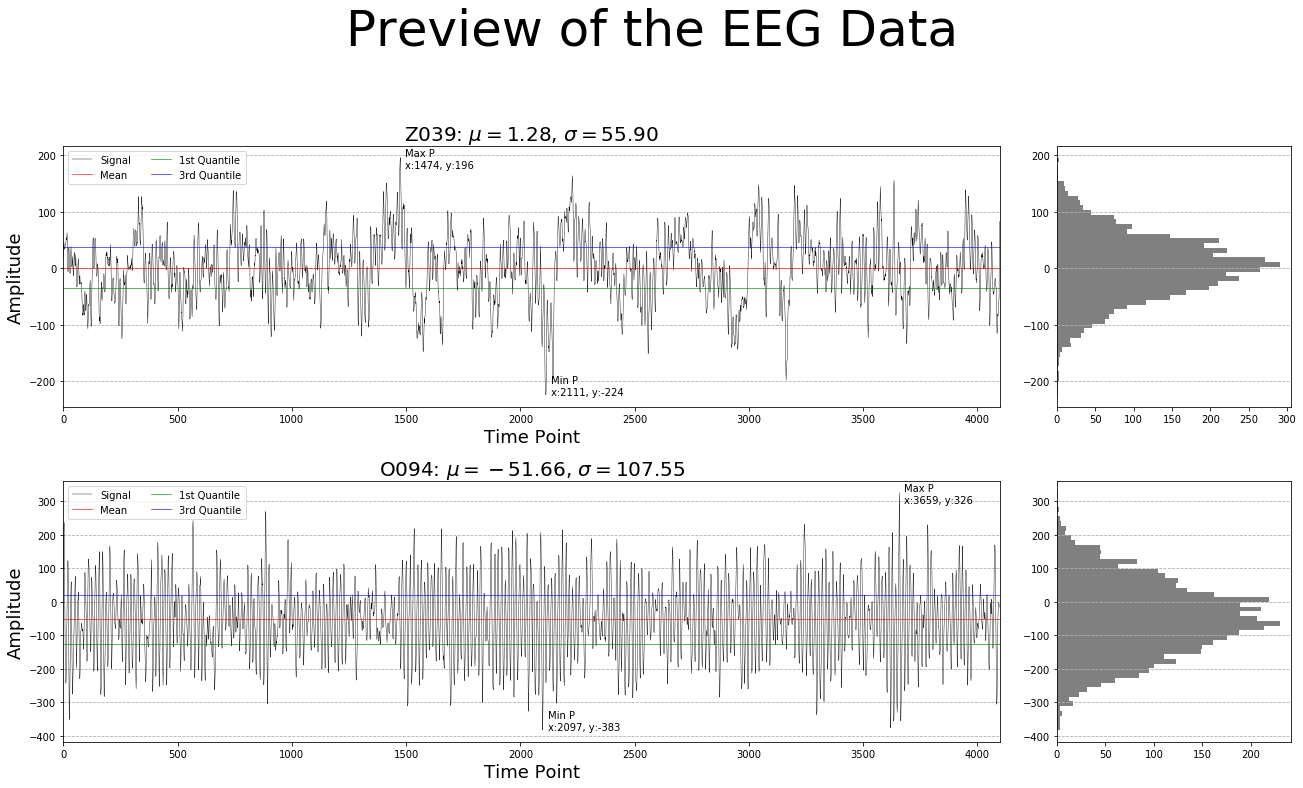

In [126]:
# Grid Axes
widths = [4,1]
#heights = [1,1,1,1,1] 
heights =[1,1]
gs_kw = dict(width_ratios=widths,height_ratios=heights)
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=[18,10],constrained_layout=True,gridspec_kw = gs_kw)

main_title = "Preview of the EEG Data"
fig.suptitle(main_title,y=1.08,fontsize=50)

# Plot
for i in range(len(rep_series_set)):
    
    series_plot(axes[i,0],rep_series_set[i])
    #series_boxplot(axes[i,1],rep_series_set[i])
    series_histplot(axes[i,1],rep_series_set[i])
    
plt.show()
